# **CARGA DE TRAIN Y TEST**

In [3]:
import numpy as np
import pandas as pd

In [4]:
x_train=pd.read_excel('04-x_train-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('04-x_test-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('04-y_train-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('04-y_test-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)

In [5]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
90,0.108751,-6.374954,14.593400,0.095845,-0.001975,0.024869,12.183836,1.023727,1.228462,-3.197824,...,8.301588,563.822876,1075.402588,-129.768188,1529.717529,801.333984,-134.538803,2567.982422,793.701721,-137.263229
531,0.121270,-8.201954,17.121172,0.086650,0.000829,0.036232,15.112854,5.192719,8.117998,-0.735017,...,9.090992,585.247742,1048.153442,-128.955841,1512.833374,795.545349,-134.079742,2492.586426,675.278625,-137.352936
492,0.606904,-13.209601,23.224224,0.001718,-0.003402,0.409911,12.496279,10.269357,7.929222,1.629503,...,6.559388,772.547180,1147.207886,-121.987343,1812.079834,817.683899,-127.388115,2857.188721,735.863586,-127.911736
200,0.096744,-4.105827,10.183212,0.089229,0.007224,0.025392,12.065578,3.247199,9.093232,1.947105,...,7.036848,516.582214,882.917358,-138.854645,1315.525391,715.823853,-141.460709,2152.940674,664.950989,-143.554459
402,0.499990,-11.732356,21.215315,-0.001074,0.000261,0.335411,13.185711,3.590707,12.123035,9.715596,...,4.381493,800.226746,1109.113647,-130.027084,1817.344238,875.490967,-131.634415,2849.190186,823.366699,-132.861969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.149555,-15.370933,26.120884,-0.009688,0.001841,0.063450,16.933447,9.306187,14.367700,8.564235,...,8.586190,763.189331,1159.005005,-129.909836,1786.598145,921.869507,-133.941422,2854.398926,734.409302,-135.763824
9,0.282050,-4.280423,11.723097,0.106487,0.001935,0.127496,10.132791,-2.429654,3.075336,-8.820043,...,7.140888,547.721313,991.450989,-129.926468,1477.806396,755.901184,-133.981094,2431.020264,688.059143,-136.076202
359,0.192612,-2.701483,8.977344,0.116996,0.002988,0.064949,5.741463,0.231968,2.121430,-8.842592,...,5.743345,602.807739,864.088928,-133.983154,1511.475708,671.055115,-137.322250,2459.401611,582.191284,-139.035492
192,1.133070,-6.956424,16.277624,0.026319,0.000978,0.991565,7.968536,-1.893435,-0.540936,3.482988,...,4.262725,843.831909,1017.151306,-123.734596,1826.814941,833.719604,-123.238251,2852.442139,733.157104,-124.088524


# **NORMALIZACION DE CARACTERISTICAS**

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [7]:
x_train_std

array([[-0.78173602,  0.24193748, -0.34913977, ..., -0.43737943,
         0.62070082, -0.37742097],
       [-0.74382941, -0.17062957,  0.1303548 , ..., -0.78596861,
        -0.80506745, -0.38435582],
       [ 0.72661163, -1.30143975,  1.28804638, ...,  0.89974974,
        -0.07564796,  0.34550626],
       ...,
       [-0.52781525,  1.07146838, -1.41445285, ..., -0.93939675,
        -1.92580304, -0.51442763],
       [ 2.31977721,  0.11063187, -0.02965829, ...,  0.87780418,
        -0.10823295,  0.64106373],
       [ 1.01642796,  0.75602162, -0.72471747, ...,  0.64664552,
        -0.01615534,  0.69839273]])

# **MODELO DE MARCHINE LEARNING**

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit(x_train_std, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [9]:
#para generar 300 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0
for i in range(300):
  sc = StandardScaler()

  x_train_std = sc.fit_transform(x_train)
  #para trasnformar los datos de testing
  x_test_std = sc.transform(x_test)
  clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
  clf.fit(x_train_std, y_train) 
  y_predict = clf.predict(x_test_std)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

 prueba :0 PRECISION ====  0.6260162601626016 
 prueba :1 PRECISION ====  0.6341463414634146 
 prueba :2 PRECISION ====  0.6422764227642277 
 prueba :3 PRECISION ====  0.6341463414634146 
 prueba :4 PRECISION ====  0.6341463414634146 
 prueba :5 PRECISION ====  0.6341463414634146 
 prueba :6 PRECISION ====  0.6260162601626016 
 prueba :7 PRECISION ====  0.6422764227642277 
 prueba :8 PRECISION ====  0.6260162601626016 
 prueba :9 PRECISION ====  0.6422764227642277 
 prueba :10 PRECISION ====  0.6341463414634146 
 prueba :11 PRECISION ====  0.6178861788617886 
 prueba :12 PRECISION ====  0.6260162601626016 
 prueba :13 PRECISION ====  0.6260162601626016 
 prueba :14 PRECISION ====  0.6260162601626016 
 prueba :15 PRECISION ====  0.6422764227642277 
 prueba :16 PRECISION ====  0.6097560975609756 
 prueba :17 PRECISION ====  0.6422764227642277 
 prueba :18 PRECISION ====  0.6422764227642277 
 prueba :19 PRECISION ====  0.6341463414634146 
 prueba :20 PRECISION ====  0.6341463414634146 
 p

In [10]:
y_predict = clf.predict(x_test_std)
y_predict

array([0, 1, 1, 2, 1, 1, 2, 0, 3, 3, 3, 3, 3, 1, 1, 0, 3, 0, 0, 1, 1, 3,
       1, 0, 1, 3, 3, 3, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 3, 3,
       1, 0, 1, 1, 3, 0, 3, 0, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1,
       3, 0, 1, 3, 0, 2, 3, 1, 1, 1, 1, 3, 1, 3, 1, 0, 1, 0, 3, 0, 1, 0,
       0, 3, 1, 3, 1, 0, 3, 1, 3, 0, 3, 1, 0, 3, 0, 0, 3, 0, 1, 0, 2, 1,
       3, 0, 3, 1, 3, 1, 3, 1, 1, 0, 1, 0, 1])

# **EVALUACION**

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        37
           1       0.56      0.71      0.63        38
           2       0.67      0.33      0.44        12
           3       0.62      0.64      0.63        36

    accuracy                           0.65       123
   macro avg       0.67      0.60      0.61       123
weighted avg       0.67      0.65      0.65       123



In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        37
           1       0.56      0.71      0.63        38
           2       0.67      0.33      0.44        12
           3       0.62      0.64      0.63        36

    accuracy                           0.65       123
   macro avg       0.67      0.60      0.61       123
weighted avg       0.67      0.65      0.65       123

Matriz de confusión, sin normalización
[[26  9  1  1]
 [ 4 27  0  7]
 [ 0  2  4  6]
 [ 2 10  1 23]]


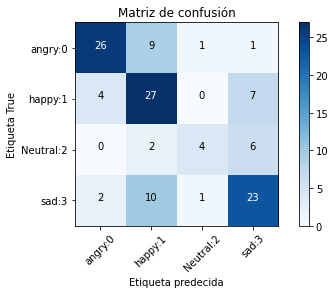

In [13]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')